## panda read vcf by chunks
ref:
https://www.biostars.org/p/416324/

https://stackoverflow.com/questions/39386458/how-to-read-data-in-python-dataframe-without-concatenating

In [ ]:
vcf_path = '/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/full_sample/vcf/full_sample.vcf.gz'
with gzip.open(vcf_path, "rt") as invcf:
    for i,line in enumerate(invcf):
        if line.startswith('#'):
            continue
        line = line.strip().split()
        if line[0] != '19':
            continue
        if i%1000000==0:
            print(i,line)
        if line[1] == '56176048':
            print(line)
        #vcf_dict.append((line[0], line[1], line[3], line[4]))

78000000 ['19', '5647287', 'chr19:5647287:G:A', 'G', 'A', '.', '.', 'PR', 'GT', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/1', '0/1', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/0', '0/

In [ ]:
import pandas as pd
import gzip

def get_vcf_names(vcf_path):
    with gzip.open(vcf_path, "rt") as ifile:
        for line in ifile:
            if line.startswith("#CHROM"):
                vcf_names = [x.strip() for x in line.split('\t')]
                break
    ifile.close()
    return vcf_names

def read_vcf_chunk(fn,chunksize=10):
    names = get_vcf_names(fn)
    try:
        vcf = pd.read_csv(fn, compression='gzip', comment='#', chunksize=chunksize, delim_whitespace=True, header=None, names=names)
    except:
        vcf = pd.read_csv(fn, comment='#', chunksize=chunksize, delim_whitespace=True, header=None, names=names)
    df= pd.DataFrame(vcf.get_chunk(chunksize))
    return df

In [ ]:
vcf = read_vcf_chunk('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/full_sample/vcf/full_sample.vcf.gz', chunksize=10)

In [ ]:
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,4_364_99,...,8_64039_20,8_64039_25,8_64039_3,25_6_107C,25_22_491C,26_EGH_EGH64401,26_SW_SW27020,10R_R111_16,10R_R114_16,10R_R114_20
0,1,10140,chr1:10140:ACCCTAAC:A,ACCCTAAC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,1,10146,chr1:10146:AC:A,AC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,1/1,0/1
2,1,10146,chr1:10146:ACC:*,ACC,*,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,1,10150,chr1:10150:CT:C,CT,C,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,./.,0/0
4,1,10172,chr1:10172:CCCTAA:C,CCCTAA,C,.,.,PR,GT,./.,...,0/0,0/0,0/0,0/0,0/0,0/0,./.,0/0,./.,./.
5,1,10178,chr1:10178:CCTAA:C,CCTAA,C,.,.,PR,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,0/0,0/0,./.
6,1,10198,chr1:10198:TAACCC:T,TAACCC,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
7,1,10206,chr1:10206:ACCCTAACCCTAACCCTAACCCTAAC:A,ACCCTAACCCTAACCCTAACCCTAAC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
8,1,10231,chr1:10231:C:A,C,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,./.,0/0,0/0,0/0,0/0,0/0
9,1,10231,chr1:10231:CCCCTAACCCTAACCCTAAACCCTAAACCCTAACC...,CCCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAAC...,*,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,./.,0/0,0/0,0/0,0/0,0/0


In [ ]:
fam = pd.read_csv('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/full_sample/bfiles/full_sample.fam',delim_whitespace=True, header=None,names = ['fid','iid','father','mother','gender','trait'])

In [ ]:
sum(fam.iid == pd.Series(vcf.columns[9:]))

3479

In [ ]:
fam

,fid,iid,father,mother,gender,trait
0,4_364,4_364_99,4_364_1,4_364_2,2,2
1,4_44,4_44_3,4_44_1,4_44_2,2,2
2,27_104,27_104_62571,27_104_84753,27_104_84752,1,2
3,27_90,27_90_84583,27_90_84575,27_90_84574,2,2
4,27_90,27_90_84784,27_90_84575,27_90_84574,2,2
...,...,...,...,...,...,...
3474,26_EGH,26_EGH_EGH64401,0,0,2,-9
3475,26_SW,26_SW_SW27020,26_SW_SW27023,26_SW_SW27022,1,-9
3476,10R_R111,10R_R111_16,10R_R111_5,10R_R111_4,1,-9
3477,10R_R114,10R_R114_16,10R_R114_2,10R_R114_3,1,-9


## 1. Family population info

In [ ]:
fam_pop = pd.read_csv(pheno_full_sample_path+'full_sample_fam_pop.txt',delim_whitespace=True,header=None,index_col=0,squeeze=True).to_dict()

In [ ]:
fam_pop['4_364']

'AF_nfe'

In [ ]:
fam_info=fam_pop['pop']

In [ ]:
fam_info.index = list(fam_pop['fid'])

In [ ]:
fam_info

4_364      AF_nfe
4_44       AF_afr
27_104     AF_nfe
27_90      AF_nfe
4_92       AF_nfe
            ...  
4_499      AF_afr
5_26170    AF_nfe
6_1103     AF_nfe
25_6       AF_nfe
26_EGH     AF_nfe
Name: pop, Length: 1068, dtype: object

?Questions for Chong: why do the last rows use characters? what is the meaning of last colnum.

In [ ]:
fam.shape

(3479, 6)

In [ ]:
pheno_full_sample_path = '/mnt/mfs/statgen/alzheimers-family/linkage_files/pheno/full_sample/'

efiga_pedigree.txt  full_sample_efi_nia.fam  full_sample_fam_id.txt  full_sample_fam_pop.txt  full_sample_id_list.txt  full_sample_pheno.txt  niaload_pedigree.txt

In [ ]:
efiga = pd.read_csv(pheno_full_sample_path+'efiga_pedigree.txt',delim_whitespace=True)

In [ ]:
efiga

,ID,SEX,AD,AGE,APOE,FATHID,MOTHID
0,127_99,1.0,1,69.0,1.0,1,2
1,127_15,0.0,0,NaN,NaN,0,0
2,127_14,1.0,0,NaN,NaN,0,0
3,127_13,0.0,0,NaN,NaN,0,0
4,127_12,1.0,0,NaN,NaN,15,99
...,...,...,...,...,...,...,...
12765,359_153,0.0,0,NaN,NaN,0,0
12766,359_154,1.0,0,NaN,NaN,153,121
12767,359_155,0.0,0,NaN,NaN,153,121
12768,359_156,0.0,0,NaN,NaN,153,121


In [ ]:
efi_nia_fam = pd.read_csv(pheno_full_sample_path+'full_sample_efi_nia.fam',delim_whitespace=True,header=None,names = ['fid','iid','father','mother','gender','trait'])

In [ ]:
efi_nia_fam

,fid,iid,father,mother,gender,trait
0,127,127_8,1,2,2,2
1,127,127_7,1,2,2,1
2,127,127_6,1,2,2,2
3,127,127_5,1,2,2,2
4,127,127_4,1,2,1,2
...,...,...,...,...,...,...
3224,4_3747,4_3747_7,6,4,2,1
3225,4_3747,4_3747_8,6,4,1,1
3226,4_3747,4_3747_9,6,4,1,1
3227,4_3832,4_3832_3,1,2,2,1


In [ ]:
efi_nia_txt = pd.read_csv(pheno_full_sample_path+'full_sample_fam_id.txt',delim_whitespace=True,header=None,names = ['fid','iid','father','mother','gender','trait','id'])

In [ ]:
efi_nia_txt

,fid,iid,father,mother,gender,trait,id
0,4_364,4_364_99,4_364_1,4_364_2,2,2,02AD4427
1,4_44,4_44_3,4_44_1,4_44_2,2,2,02AD4429
2,27_104,27_104_62571,27_104_84753,27_104_84752,1,2,03AD4435
3,27_90,27_90_84583,27_90_84575,27_90_84574,2,2,03AD4437
4,27_90,27_90_84784,27_90_84575,27_90_84574,2,2,03AD4438
...,...,...,...,...,...,...,...
3474,26_EGH,26_EGH_EGH64401,0,0,2,-9,05AD8765
3475,26_SW,26_SW_SW27020,26_SW_SW27023,26_SW_SW27022,1,-9,07AD1732
3476,10R_R111,10R_R111_16,10R_R111_5,10R_R111_4,1,-9,10AD23886
3477,10R_R114,10R_R114_16,10R_R114_2,10R_R114_3,1,-9,10AD32608


In [ ]:
sample_id_list = pd.read_csv(pheno_full_sample_path+'full_sample_id_list.txt',delim_whitespace=True,header=None,names = ['id'])

In [ ]:
sample_id_list

,id
0,02AD4427
1,02AD4429
2,03AD4435
3,03AD4437
4,03AD4438
...,...
3474,05AD8765
3475,07AD1732
3476,10AD23886
3477,10AD32608


In [ ]:
sample_pheno = pd.read_csv(pheno_full_sample_path+'full_sample_pheno.txt',sep='\t')

In [ ]:
sample_pheno

,project/alzheimers-family/linkage_files/pheno/full_sample/niaload_pedigree.txtIID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop
0,02AD4427,4_364_99,CCDG_12711,NYGC2,F,2.0,71.0,1.0,1.0,NIALOAD,4_364,European,European
1,02AD4429,4_44_3,CCDG_12711,NYGC2,F,2.0,90.0,1.0,2.0,NIALOAD,4_44,African,African
2,03AD4435,27_104_62571,CCDG_11949,NYGC1,M,2.0,74.0,1.0,1.0,NIALOAD,27_104,European,European
3,03AD4437,27_90_84583,CCDG_11949,NYGC1,F,2.0,71.0,1.0,1.0,NIALOAD,27_90,European,European
4,03AD4438,27_90_84784,CCDG_11949,NYGC1,F,2.0,85.0,0.0,1.0,NIALOAD,27_90,European,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,05AD8765,26_EGH_EGH64401,CCDG_11949,NYGC1,F,NaN,NaN,1.0,NaN,NIALOAD,26_EGH,European,European
3475,07AD1732,26_SW_SW27020,CCDG_11949,NYGC1,M,NaN,NaN,0.0,2.0,NIALOAD,26_SW,European,European
3476,10AD23886,10R_R111_16,CCDG_12711,NYGC2,M,NaN,69.0,0.0,2.0,NIALOAD,10R_R111,European,European
3477,10AD32608,10R_R114_16,CCDG_12711,NYGC2,M,NaN,63.0,1.0,2.0,NIALOAD,10R_R114,European,European


In [ ]:
sample_pheno[sample_pheno.ID == '167_DCH23.54']

,project/alzheimers-family/linkage_files/pheno/full_sample/niaload_pedigree.txtIID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop


In [ ]:
sample_pheno.describe(include='all')

,project/alzheimers-family/linkage_files/pheno/full_sample/niaload_pedigree.txtIID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop
count,3479,3479,3479,3479,3479,3472.000000,3372.000000,3365.000000,3478.000000,3479,3479,3479,3479
unique,3479,3479,8,8,2,NaN,NaN,NaN,NaN,3,1068,4,4
top,02AD4427,4_364_99,CCDG_12711,NYGC2,F,NaN,NaN,NaN,NaN,EFIGA,3761,Hispanic,Hispanic
freq,1,1,1172,1172,2180,NaN,NaN,NaN,NaN,2059,47,2133,2133
mean,NaN,NaN,NaN,NaN,NaN,1.339286,91.765563,0.660921,2.480161,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.612784,366.352308,0.690971,3.706756,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-9.000000,35.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,66.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,73.000000,1.000000,3.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,80.000000,1.000000,3.000000,NaN,NaN,NaN,NaN


In [ ]:
nia_ped = pd.read_csv(pheno_full_sample_path+'niaload_pedigree.txt',delim_whitespace=True)

In [ ]:
nia_ped

,Sample_ID,FID,Gender,MOTHID,FATHID,prob.AD,APOE,APOE4NUM,AAO_AgeLastSeen
0,10J_103_1,10J_103,M,3,10,2,33,0.0,69.0
1,10J_103_10,10J_103,M,0,0,-9,NANA,NaN,NaN
2,10J_103_2,10J_103,F,3,4,2,34,1.0,71.0
3,10J_103_3,10J_103,F,0,0,-9,NANA,NaN,NaN
4,10J_103_4,10J_103,M,0,0,-9,NANA,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6303,26_CJE_CJE43421,26_CJE,M,CJE43406,-9,NANA,NaN,NaN,NaN
6304,26_CBL_CBL12416,26_CBL,F,CBL12403,-9,NANA,NaN,NaN,NaN
6305,26_ARH_ARH05007,26_ARH,F,ARH05004,-9,NANA,NaN,NaN,NaN
6306,26_RBR_RBR22809,26_RBR,F,RBR22801,-9,NANA,NaN,NaN,NaN


In [ ]:
nia_ped[nia_ped.Sample_ID == '167_DCH23.54']

,Sample_ID,FID,Gender,MOTHID,FATHID,prob.AD,APOE,APOE4NUM,AAO_AgeLastSeen


## sample_i

In [ ]:
s1_vcf = read_vcf_chunk('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/sample_i/rare_positions/sample_i_coding.hg38_multianno.vcf.gz')

In [ ]:
s1_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,4_553_5,...,756_43,3745_31,3745_36,3745_35,3745_33,4_558_15,8_64039_3,280_12,770_13,770_14
0,1,69496,chr1:69496:G:A,G,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0024;AF_raw=0.0...,GT,0/0,...,./.,0/0,./.,./.,./.,0/0,./.,./.,0/0,./.
1,1,69590,chr1:69590:T:A,T,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0005;AF_raw=0.0...,GT,0/0,...,./.,0/0,./.,./.,./.,0/0,0/0,./.,./.,0/0
2,1,69655,chr1:69655:G:C,G,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=4.253e-05;AF_raw=...,GT,0/0,...,./.,0/0,./.,./.,./.,0/0,./.,0/0,./.,0/0
3,1,139849,chr1:139849:T:C,T,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=9.367e-06;AF_raw=...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,1,182735,chr1:182735:C:A,C,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=8.027e-05;AF_raw=...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
5,1,183188,chr1:183188:A:C,A,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0017;AF_raw=0.0...,GT,0/0,...,0/0,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
6,1,183189,chr1:183189:G:C,G,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0229;AF_raw=0.0...,GT,0/0,...,0/0,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
7,1,183199,chr1:183199:G:A,G,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0002;AF_raw=0.0...,GT,0/0,...,./.,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
8,1,183205,chr1:183205:G:C,G,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=.;AF_raw=.;AF_mal...,GT,0/0,...,./.,0/0,./.,./.,0/0,0/0,0/0,0/0,0/0,0/0
9,1,183220,chr1:183220:A:G,A,G,.,.,.;ANNOVAR_DATE=2019-10-24;AF=7.051e-06;AF_raw=...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [ ]:
s1_fam = pd.read_csv('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/sample_i/rare_positions/sample_i_coding.hg38_multianno.fam',delim_whitespace=True, header=None,names = ['fid','iid','father','mother','gender','trait'])

In [ ]:
s1_fam

,fid,iid,father,mother,gender,trait
0,4_553,4_553_5,0,0,1,1
1,4_558,4_558_34,0,0,1,1
2,4_558,4_558_33,0,0,2,0
3,4_558,4_558_11,0,0,1,1
4,4_558,4_558_99,0,0,1,1
...,...,...,...,...,...,...
161,4_558,4_558_15,4_558_99,4_558_33,2,0
162,8_64039,8_64039_3,8_64039_2,8_64039_1,1,0
163,280,280_12,280_13,280_9,1,1
164,770,770_13,770_99,770_10,1,1


In [ ]:
s1_anno = pd.read_csv('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/sample_i/rare_positions/sample_i_coding.hg38_multianno.txt',delim_whitespace=True)

/home/yh3455/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
s1_anno

,Chr,Start,End,Ref,Alt,AF,AF_raw,AF_male,AF_female,AF_afr,...,Otherinfo169,Otherinfo170,Otherinfo171,Otherinfo172,Otherinfo173,Otherinfo174,Otherinfo175,Otherinfo176,Otherinfo177,Otherinfo178
0,1,69496,69496,G,A,0.0024,0.0022,0.0026,0.0022,0.0062,...,./.,0/0,./.,./.,./.,0/0,./.,./.,0/0,./.
1,1,69590,69590,T,A,0.0005,0.0005,0.0006,0.0004,0.0001,...,./.,0/0,./.,./.,./.,0/0,0/0,./.,./.,0/0
2,1,69655,69655,G,C,4.253e-05,8.251e-05,3.033e-05,5.324e-05,0.0001,...,./.,0/0,./.,./.,./.,0/0,./.,0/0,./.,0/0
3,1,139849,139849,T,C,9.367e-06,1.425e-05,0,1.779e-05,0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,1,182735,182735,C,A,8.027e-05,7.724e-05,7.531e-05,8.493e-05,2.675e-05,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427086,22,50769522,50769522,T,G,0.0043,0.0043,0.0043,0.0043,0.0143,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
427087,22,50775824,50775824,C,T,2.791e-05,2.789e-05,2.881e-05,2.708e-05,0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
427088,22,50776669,50776669,C,A,3.488e-05,3.487e-05,1.44e-05,5.415e-05,2.378e-05,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
427089,22,50777958,50777958,T,G,0.0055,0.0055,0.0056,0.0055,0.0184,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


## sample_ii

In [ ]:
s2_vcf = read_vcf_chunk('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/sample_ii/rare_positions/sample_ii_coding.hg38_multianno.vcf.gz')

In [ ]:
s2_vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,4_515_3,...,4_515_69,4_515_78,4_515_8,4_515_9,4_515_99,4_558_15,4_558_22,4_558_27,4_558_31,4_558_42
0,1,69496,chr1:69496:G:A,G,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0024;AF_raw=0.0...,GT,0/0,...,./.,0/0,./.,./.,./.,./.,0/0,0/0,0/0,./.
1,1,69590,chr1:69590:T:A,T,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0005;AF_raw=0.0...,GT,0/0,...,./.,0/0,./.,./.,./.,./.,0/0,0/0,0/0,./.
2,1,69655,chr1:69655:G:C,G,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=4.253e-05;AF_raw=...,GT,0/0,...,./.,0/0,./.,./.,./.,0/0,0/0,0/0,0/0,./.
3,1,139849,chr1:139849:T:C,T,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=9.367e-06;AF_raw=...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,1,182735,chr1:182735:C:A,C,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=8.027e-05;AF_raw=...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
5,1,183188,chr1:183188:A:C,A,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0017;AF_raw=0.0...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
6,1,183189,chr1:183189:G:C,G,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0229;AF_raw=0.0...,GT,0/0,...,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0,0/0,0/0
7,1,183199,chr1:183199:G:A,G,A,.,.,.;ANNOVAR_DATE=2019-10-24;AF=0.0002;AF_raw=0.0...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
8,1,183205,chr1:183205:G:C,G,C,.,.,.;ANNOVAR_DATE=2019-10-24;AF=.;AF_raw=.;AF_mal...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
9,1,183220,chr1:183220:A:G,A,G,.,.,.;ANNOVAR_DATE=2019-10-24;AF=7.051e-06;AF_raw=...,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [ ]:
s2_vcf.columns[9:]==s2_fam.iid[:222]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
s2_fam = pd.read_csv('/mnt/mfs/statgen/alzheimers-family/linkage_files/pheno/sample_ii/small_sample_ii.fam',delim_whitespace=True, header=None,names = ['fid','iid','father','mother','gender','trait'])

In [ ]:
s2_fam

,fid,iid,father,mother,gender,trait
0,4_515,4_515_3,4_515_25,4_515_7,2.0,1
1,4_515,4_515_29,4_515_30,4_515_99,2.0,1
2,4_515,4_515_11,4_515_1,4_515_2,2.0,2
3,4_515,4_515_48,4_515_45,4_515_49,2.0,1
4,4_515,4_515_19,4_515_5,4_515_20,2.0,1
...,...,...,...,...,...,...
1205,4_558,4_558_AAAA,0,0,1.0,1
1206,4_558,4_558_CCCC,0,0,2.0,1
1207,4_558,4_558_BBBB,0,0,1.0,1
1208,10R_R78,10R_R78_55,10R_R78_12,10R_R78_47,1.0,-9


In [ ]:
tmp1=s2_fam.fid[222:].value_counts()

In [ ]:
tmp2 = s2_fam.fid[:222].value_counts()

In [ ]:
pd.DataFrame([[i,tmp1[i],tmp2[i]] for i in tmp1.keys()],columns=['fid','all','vcf'])

,fid,all,vcf
0,3761,220,47
1,359,157,21
2,4_558,132,19
3,4_162,103,20
4,4_515,93,21
5,167,78,25
6,1819,58,18
7,1241,51,16
8,10R_R78,50,17
9,834,46,18


In [ ]:
tmp2[]

In [ ]:
s2_fam[s2_fam.fid == '3761']

,fid,iid,father,mother,gender,trait
97,3761,3761_3,3761_1,3761_2,1.0,2
98,3761,3761_4,3761_1,3761_2,1.0,2
99,3761,3761_9,3761_1,3761_2,2.0,2
100,3761,3761_11,3761_99,3761_10,1.0,2
101,3761,3761_13,3761_99,3761_10,2.0,2
...,...,...,...,...,...,...
791,3761,3761_218,3761_42,3761_213,1.0,0
792,3761,3761_219,3761_42,3761_213,2.0,0
793,3761,3761_220,3761_42,3761_213,2.0,0
794,3761,3761_221,3761_42,3761_213,2.0,0


In [ ]:
s2_anno = pd.read_csv('/mnt/mfs/statgen/alzheimers-family/linkage_files/geno/sample_ii/rare_positions/sample_ii_coding.hg38_multianno.txt',delim_whitespace=True)

/home/yh3455/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
s2_anno

,Chr,Start,End,Ref,Alt,AF,AF_raw,AF_male,AF_female,AF_afr,...,Otherinfo225,Otherinfo226,Otherinfo227,Otherinfo228,Otherinfo229,Otherinfo230,Otherinfo231,Otherinfo232,Otherinfo233,Otherinfo234
0,1,69496,69496,G,A,0.0024,0.0022,0.0026,0.0022,0.0062,...,./.,0/0,./.,./.,./.,./.,0/0,0/0,0/0,./.
1,1,69590,69590,T,A,0.0005,0.0005,0.0006,0.0004,0.0001,...,./.,0/0,./.,./.,./.,./.,0/0,0/0,0/0,./.
2,1,69655,69655,G,C,4.253e-05,8.251e-05,3.033e-05,5.324e-05,0.0001,...,./.,0/0,./.,./.,./.,0/0,0/0,0/0,0/0,./.
3,1,139849,139849,T,C,9.367e-06,1.425e-05,0,1.779e-05,0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,1,182735,182735,C,A,8.027e-05,7.724e-05,7.531e-05,8.493e-05,2.675e-05,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427086,22,50769522,50769522,T,G,0.0043,0.0043,0.0043,0.0043,0.0143,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
427087,22,50775824,50775824,C,T,2.791e-05,2.789e-05,2.881e-05,2.708e-05,0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
427088,22,50776669,50776669,C,A,3.488e-05,3.487e-05,1.44e-05,5.415e-05,2.378e-05,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
427089,22,50777958,50777958,T,G,0.0055,0.0055,0.0056,0.0055,0.0184,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [ ]:
s2_fam[s2_fam.duplicated()]

,fid,iid,father,mother,gender,trait
222,167,167_99,167_1,167_2,1.0,2
231,167,167_11,167_4,167_12,2.0,1
234,167,167_8,167_1,167_2,1.0,2
236,167,167_6,167_1,167_2,1.0,2
238,167,167_4,167_1,167_2,1.0,2
...,...,...,...,...,...,...
1164,4_558,4_558_72,4_558_68,4_558_69,2.0,2
1165,4_558,4_558_73,4_558_75,4_558_72,2.0,1
1166,4_558,4_558_74,4_558_68,4_558_69,2.0,1
1172,4_558,4_558_8,4_558_1,4_558_2,1.0,1


In [ ]:
s2_vcf.columns[9:]

Index(['4_515_3', '4_515_29', '4_515_11', '4_515_48', '4_515_19', '4_515_50',
       '4_558_34', '4_558_33', '4_558_8', '4_558_11',
       ...
       '4_515_69', '4_515_78', '4_515_8', '4_515_9', '4_515_99', '4_558_15',
       '4_558_22', '4_558_27', '4_558_31', '4_558_42'],
      dtype='object', length=222)

In [ ]:
len(s2_vcf.columns[9:])

222

In [ ]:
s2_fam[s2_fam.iid == '167_28']

,fid,iid,father,mother,gender,trait
144,167,167_28,167_29,167_26,2.0,-9
293,167,167_28,167_29,167_26,2.0,0


In [ ]:
s2_fam[s2_fam.iid == '1819_10']

,fid,iid,father,mother,gender,trait
166,1819,1819_10,1819_1,1819_2,1.0,-9
484,1819,1819_10,1819_1,1819_2,1.0,0


In [ ]:
s2_fam[s2_fam.iid == '167_DCH23.54']

,fid,iid,father,mother,gender,trait
559,167,167_DCH23.54,167_23,167_54,NaN,0


In [ ]:
s2_fam[210:230]

,fid,iid,father,mother,gender,trait
210,4_515,4_515_36,4_515_37,4_515_10,2.0,1
211,4_515,4_515_5,4_515_1,4_515_2,1.0,2
212,4_515,4_515_69,4_515_64,4_515_65,1.0,2
213,4_515,4_515_78,4_515_70,4_515_66,2.0,1
214,4_515,4_515_8,4_515_1,4_515_2,2.0,2
215,4_515,4_515_9,4_515_1,4_515_2,2.0,2
216,4_515,4_515_99,4_515_1,4_515_2,2.0,2
217,4_558,4_558_15,4_558_99,4_558_33,2.0,1
218,4_558,4_558_22,4_558_4,4_558_35,1.0,1
219,4_558,4_558_27,4_558_8,4_558_38,2.0,1


In [ ]:
s2_fam.drop_duplicates().to_csv('/mnt/mfs/statgen/alzheimers-family/yhseqlink/data/MWE/sample2_uniq.fam',header=False,index=False,sep='\t')

coding_region_rare_variant_positions.txt 
3. why do you choose these snps?

4. vcf hg19? hg38?

## Genome hg19 vs hg38

In [ ]:
hg19 = pd.read_csv('/home/yh3455/.SEQLinkage/genemap.hg19.txt',header=None,sep='\t')

In [ ]:
hg38 = pd.read_csv('/home/yh3455/.SEQLinkage/genemap.hg38.txt',header=None,sep='\t')

In [ ]:
hg19

,0,1,2,3,4,5,6
0,1,11868,14362,LOC102725121@1,9.177127e-07,0.000001,6.814189e-07
1,1,11873,14409,DDX11L1,9.195321e-07,0.000001,6.827698e-07
2,1,14361,29370,WASH7P,1.529988e-06,0.000002,1.136045e-06
3,1,17368,17436,"MIR6859-1@1,MIR6859-2@1,MIR6859-3@1,MIR6859-4@1",1.217693e-06,0.000002,9.041595e-07
4,1,30365,30503,"MIR1302-10@1,MIR1302-11@1,MIR1302-2@1,MIR1302-9@1",2.129597e-06,0.000003,1.581266e-06
...,...,...,...,...,...,...,...
28483,X,154842225,155012119,SPRY3,NaN,196.056662,NaN
28484,X,155111007,155173433,VAMP7,NaN,196.190010,5.600000e+01
28485,X,155227360,155240482,IL9R,NaN,196.305985,NaN
28486,X,155244228,155246495,WASIR1,NaN,196.320452,NaN


In [ ]:
hg38

,0,1,2,3,4,5,6
0,1,11868,14362,LOC102725121@1,9.177127e-07,0.000001,6.814189e-07
1,1,11873,14409,DDX11L1,9.195321e-07,0.000001,6.827698e-07
2,1,14361,29370,WASH7P,1.529988e-06,0.000002,1.136045e-06
3,1,17368,17436,"MIR6859-1@1,MIR6859-2@1,MIR6859-3@1,MIR6859-4@1",1.217693e-06,0.000002,9.041595e-07
4,1,30365,30503,"MIR1302-10@1,MIR1302-11@1,MIR1302-2@1,MIR1302-9@1",2.129597e-06,0.000003,1.581266e-06
...,...,...,...,...,...,...,...
28320,X,155612564,155782457,SPRY3,NaN,196.056662,NaN
28321,X,155881344,155943769,VAMP7,NaN,196.190010,5.600000e+01
28322,X,155997695,156010817,IL9R,NaN,196.305985,NaN
28323,X,156014563,156016830,WASIR1,NaN,196.320452,NaN


### MAF anno

In [ ]:
anno = pd.read_csv('../MWE/annotation/EFIGA_NIALOAD_chr19.hg38.hg38_multianno.csv')

In [ ]:
anno

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,CLNDISDB,CLNREVSTAT,CLNSIG,DN ID,Patient ID,Phenotype,Platform,Study,Pubmed ID,Otherinfo1
0,19,60798,60799,GC,G,downstream,WASH5P,dist=152,.,.,...,.,.,.,.,.,.,.,.,.,chr19:60798:GC:G
1,19,61852,61852,G,A,ncRNA_exonic,WASH5P,.,.,.,...,.,.,.,.,.,.,.,.,.,chr19:61852:G:A
2,19,62153,62153,C,G,ncRNA_intronic,WASH5P,.,.,.,...,.,.,.,.,.,.,.,.,.,chr19:62153:C:G
3,19,62155,62155,A,G,ncRNA_intronic,WASH5P,.,.,.,...,.,.,.,.,.,.,.,.,.,chr19:62155:A:G
4,19,62935,62937,CCT,C,ncRNA_intronic,WASH5P,.,.,.,...,.,.,.,.,.,.,.,.,.,chr19:62935:CCT:C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036184,19,58607472,58607478,CGTTGGG,*,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,chr19:58607472:CGTTGGG:*
2036185,19,58607500,58607501,AG,A,intergenic,CENPBD1P1;NONE,dist=23105;dist=NONE,.,.,...,.,.,.,.,.,.,.,.,.,chr19:58607500:AG:A
2036186,19,58607500,58607502,AGG,*,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,chr19:58607500:AGG:*
2036187,19,58607513,58607513,A,C,intergenic,CENPBD1P1;NONE,dist=23118;dist=NONE,.,.,...,.,.,.,.,.,.,.,.,.,chr19:58607513:A:C


In [ ]:
af = anno.AF

In [ ]:
af = af.replace('.',0)

In [ ]:
af = af.astype(float)

In [ ]:
anno[af>0.05].Otherinfo1

3                                            chr19:62155:A:G
10                                          chr19:75129:GT:G
11                                         chr19:75129:G:GAT
15                                          chr19:80633:TC:T
20                                           chr19:80794:T:C
                                 ...                        
2036164    chr19:58607161:CCCCCCCCCCCTCTCTGCGCCTGCGCCGGCG...
2036169                                   chr19:58607249:C:T
2036179                                   chr19:58607412:G:C
2036180                                   chr19:58607416:C:G
2036183                                   chr19:58607472:C:G
Name: Otherinfo1, Length: 238548, dtype: object

In [ ]:
import pickle
with open('../data/wg20220311/chr19test/CACHE/common_variants.pickle','wb') as handle:
    pickle.dump(anno[af>0.05].Otherinfo1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pandas as pd
import pickle

In [ ]:
for i in range(1,23):
    print(i)
    anno = pd.read_csv('../MWE/annotation/EFIGA_NIALOAD_chr'+str(i)+'.hg38.hg38_multianno.csv')
    af = anno.AF
    af = af.replace('.',0)
    af = af.astype(float)
    with open('../data/wg20220316/chr'+str(i)+'_common_variants.pickle','wb') as handle:
        pickle.dump(anno[af>0.05].Otherinfo1, handle, protocol=pickle.HIGHEST_PROTOCOL)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [ ]:
maf = anno[['Chr','Start','End','Ref','Alt','AF','AF_afr','AF_ami','AF_amr','AF_asj','AF_eas','AF_fin','AF_nfe','AF_oth','AF_sas']]

In [ ]:
maf.iloc[:,5:][anno.Otherinfo1=='chr19:44907386:C:A']

,AF,AF_afr,AF_ami,AF_amr,AF_asj,AF_eas,AF_fin,AF_nfe,AF_oth,AF_sas
1513641,8.38e-05,0,0,0.0008,0,0,0,1.549e-05,0,0


In [ ]:
pheno_full_sample_path = '/mnt/mfs/statgen/alzheimers-family/linkage_files/pheno/full_sample/'

In [ ]:
fam_anc = pd.read_csv(pheno_full_sample_path+'full_sample_fam_pop.txt',delim_whitespace=True,header=None,index_col=0,names=['fid','anc'])

In [ ]:
sum(fam_anc.anc.isin(['AF','AF_raw','AF_male','AF_female','AF_afr','AF_ami','AF_amr','AF_asj','AF_eas','AF_fin','AF_nfe','AF_oth','AF_sas']))

1064

In [ ]:
maf_gene = maf.iloc[:,5:]

In [ ]:
maf_gene = maf_gene.replace('.',np.nan)

In [ ]:
sum(maf_gene.isna().all(axis=1))

237376

In [ ]:
sum(maf_gene.AF.isna())

237376

In [ ]:
maf_gene = maf_gene.astype(np.float64)

<AxesSubplot:>

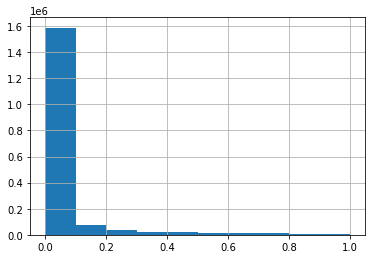

In [ ]:
maf_gene.AF_afr.hist()

<AxesSubplot:>

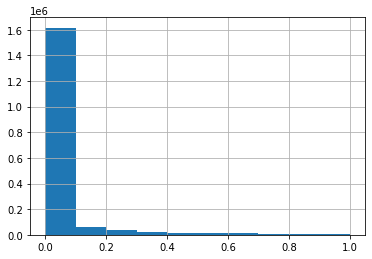

In [ ]:
maf_gene.AF.hist()

In [ ]:
maf_gene = maf_gene.replace(0,10**-5)

In [ ]:
maf_gene[maf_gene.sum(axis=1)==0] = 10**-5

In [ ]:
maf_gene[maf_gene.AF.isna() & (maf_gene.isna().all(axis=1)==False)]

,AF,AF_afr,AF_ami,AF_amr,AF_asj,AF_eas,AF_fin,AF_nfe,AF_oth,AF_sas


In [ ]:
for i in ['AF','AF_afr','AF_ami','AF_amr','AF_asj','AF_eas','AF_fin','AF_nfe','AF_oth','AF_sas']:
    print(i,sum(maf_gene[i].isna()))

AF 237376
AF_afr 237383
AF_ami 237781
AF_amr 237399
AF_asj 237460
AF_eas 237540
AF_fin 237457
AF_nfe 237383
AF_oth 237464
AF_sas 237600


In [ ]:
import numpy as np

In [ ]:
X = maf_gene.corr()

In [ ]:
X.values[[np.arange(X.shape[0])]*2] = 0

/tmp/1974374.1.plot.q/ipykernel_27113/215268539.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X.values[[np.arange(X.shape[0])]*2] = 0


In [ ]:
import scipy

In [ ]:
from scipy.spatial.distance import squareform

In [ ]:
v = squareform(X)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
X.columns

Index(['AF', 'AF_raw', 'AF_male', 'AF_female', 'AF_afr', 'AF_ami', 'AF_amr',
       'AF_asj', 'AF_eas', 'AF_fin', 'AF_nfe', 'AF_oth', 'AF_sas'],
      dtype='object')

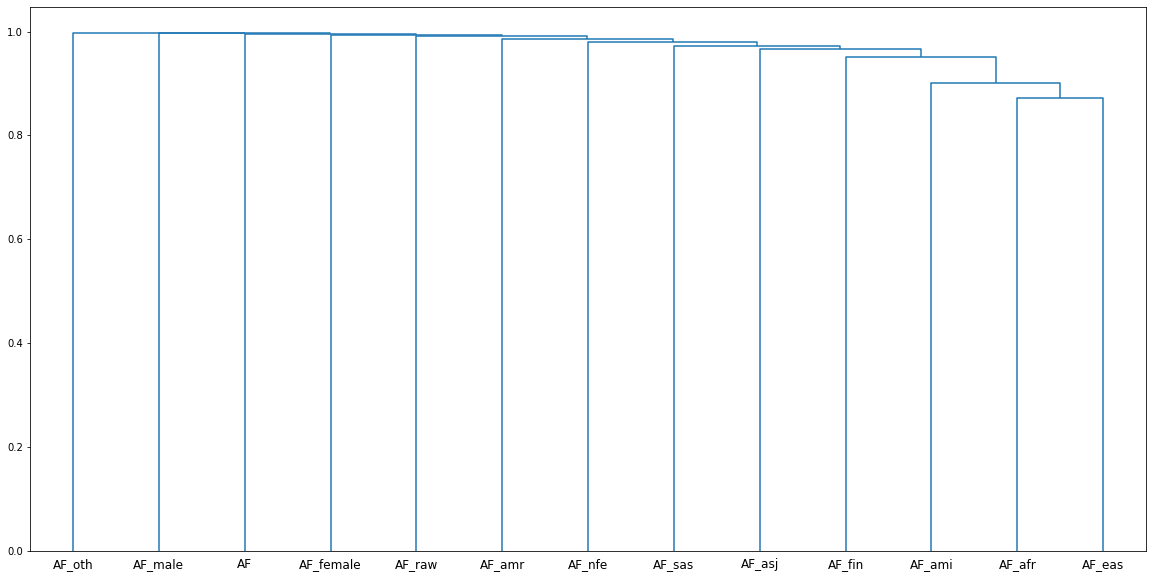

In [ ]:
Z = linkage(v, 'ward')
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z,labels=list(X.columns))
plt.show()

In [ ]:
len(v)

78

In [ ]:
X.shape

(13, 13)

In [ ]:
maf_gene.sum(axis=1)

0    0.000000
1    0.722100
2    0.001697
3    0.000000
4    0.000890
5    0.000075
6    0.000000
7    0.001193
8    0.057300
9    0.000000
dtype: float64

In [ ]:
maf_gene.corr()

""


In [ ]:
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,4_364_99,...,8_64039_20,8_64039_25,8_64039_3,25_6_107C,25_22_491C,26_EGH_EGH64401,26_SW_SW27020,10R_R111_16,10R_R114_16,10R_R114_20
0,1,10140,chr1:10140:ACCCTAAC:A,ACCCTAAC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1,1,10146,chr1:10146:AC:A,AC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/1,0/0,0/0,0/0,0/1,0/0,1/1,0/1
2,1,10146,chr1:10146:ACC:*,ACC,*,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,1,10150,chr1:10150:CT:C,CT,C,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,./.,0/0
4,1,10172,chr1:10172:CCCTAA:C,CCCTAA,C,.,.,PR,GT,./.,...,0/0,0/0,0/0,0/0,0/0,0/0,./.,0/0,./.,./.
5,1,10178,chr1:10178:CCTAA:C,CCTAA,C,.,.,PR,GT,./.,...,./.,./.,./.,./.,./.,./.,./.,0/0,0/0,./.
6,1,10198,chr1:10198:TAACCC:T,TAACCC,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
7,1,10206,chr1:10206:ACCCTAACCCTAACCCTAACCCTAAC:A,ACCCTAACCCTAACCCTAACCCTAAC,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
8,1,10231,chr1:10231:C:A,C,A,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,./.,0/0,0/0,0/0,0/0,0/0
9,1,10231,chr1:10231:CCCCTAACCCTAACCCTAAACCCTAAACCCTAACC...,CCCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAAC...,*,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,./.,0/0,0/0,0/0,0/0,0/0


In [ ]:
def get_fam_mafs(geno,anno,famid):
    

In [ ]:
fam_mafs = {}
fam_mafsfam_anc.loc['4_44'].values[0]

In [ ]:
tmp.values[0]

'AF_afr'

###  Other

In [ ]:
bim = pd.read_csv('../sample_i/bfiles/small_sample_i.bim',header=None,sep='\t')

In [ ]:
bim.columns = ['chrom','snp','i','pos','a0','a1']

In [ ]:
sum(bim['chrom']==8)

4629525

In [ ]:
bim['chrom'].value_counts()

2     7229021
1     6803175
3     5923962
4     5816676
5     5364815
6     5144967
7     4974962
8     4629525
10    4155440
11    4077632
12    4017508
9     3755806
23    3450196
13    2961521
16    2811328
14    2711866
17    2535285
15    2499784
18    2346118
19    2036188
20    1988062
22    1274837
21    1160685
24     141398
Name: chrom, dtype: int64

## VIP genes

In [ ]:
geno = pd.read_csv('data/genemap.hg38.txt',header=None,sep ='\t')

In [ ]:
vipgeno = geno[list(geno[[3]].isin(['CACNG7','LOC101928105','TNFRSF21','DMAP1','SPRED1','RAP2B'])[3])]

In [ ]:
vipgeno

,0,1,2,3,4,5,6
805,1,44213470,44220673,DMAP1,75.251066,94.798685,57.749636
5789,3,150734470,150738985,LOC101928105,161.413342,207.151217,118.305458
5812,3,153162225,153170626,RAP2B,163.936112,210.684512,119.933212
9339,6,47231531,47309905,TNFRSF21,76.419125,92.487119,61.778924
19589,15,38252835,38357249,SPRED1,37.581737,41.734078,33.602379
25109,19,53912736,53943715,CACNG7,97.646052,120.742719,75.332038


In [ ]:
vipgeno.to_csv('data/vipgenemap.hg38.txt',header=False,index=False,sep='\t')

## Complete fam file creation

In [ ]:
pheno_full_sample_path = '/mnt/mfs/statgen/alzheimers-family/linkage_files/pheno/full_sample/'

efiga_pedigree.txt  full_sample_efi_nia.fam  full_sample_fam_id.txt  full_sample_fam_pop.txt  full_sample_id_list.txt  full_sample_pheno.txt  niaload_pedigree.txt

In [ ]:
pheno_df = pd.read_csv('/mnt/mfs/statgen/alzheimers-family/pheno/pheno_modified/AD.txt',header=0,sep='\t')

In [ ]:
efiga_ped = pd.read_csv(pheno_full_sample_path+'efiga_pedigree.txt',delim_whitespace=True)

In [ ]:
efiga_ped

,ID,SEX,AD,AGE,APOE,FATHID,MOTHID
0,127_99,1.0,1,69.0,1.0,1,2
1,127_15,0.0,0,NaN,NaN,0,0
2,127_14,1.0,0,NaN,NaN,0,0
3,127_13,0.0,0,NaN,NaN,0,0
4,127_12,1.0,0,NaN,NaN,15,99
...,...,...,...,...,...,...,...
12765,359_153,0.0,0,NaN,NaN,0,0
12766,359_154,1.0,0,NaN,NaN,153,121
12767,359_155,0.0,0,NaN,NaN,153,121
12768,359_156,0.0,0,NaN,NaN,153,121


In [ ]:
nia_ped = pd.read_csv(pheno_full_sample_path+'niaload_pedigree.txt',delim_whitespace=True)

In [ ]:
nia_ped[nia_ped.FID =='27_25']

,Sample_ID,FID,Gender,MOTHID,FATHID,prob.AD,APOE,APOE4NUM,AAO_AgeLastSeen
2655,27_25_62220,27_25,F,84401,84402,2,44,2.0,79.0
2656,27_25_62222,27_25,F,84401,84402,2,44,2.0,68.0
2657,27_25_84237,27_25,F,84401,84402,2,NANA,NaN,NaN
2658,27_25_84401,27_25,F,0,0,2,NANA,NaN,NaN
2659,27_25_84402,27_25,M,0,0,1,NANA,NaN,NaN
2660,27_25_85555,27_25,F,84237,85736,1,34,1.0,79.0
2661,27_25_85736,27_25,M,0,0,1,NANA,NaN,NaN
2662,27_25_85742,27_25,F,85743,85744,1,44,2.0,65.0
2663,27_25_85743,27_25,F,0,0,-9,NANA,NaN,NaN
2664,27_25_85744,27_25,M,84401,84402,2,NANA,NaN,NaN


In [ ]:
pheno_df

,IID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop
0,02AD4427,4_364_99,CCDG_12711,NYGC2,F,2.0,71.0,1.0,1.0,NIALOAD,4_364,European,European
1,02AD4429,4_44_3,CCDG_12711,NYGC2,F,2.0,90.0,1.0,2.0,NIALOAD,4_44,African,African
2,03AD4435,27_104_62571,CCDG_11949,NYGC1,M,2.0,74.0,1.0,1.0,NIALOAD,27_104,European,European
3,03AD4437,27_90_84583,CCDG_11949,NYGC1,F,2.0,71.0,1.0,1.0,NIALOAD,27_90,European,European
4,03AD4438,27_90_84784,CCDG_11949,NYGC1,F,2.0,85.0,0.0,1.0,NIALOAD,27_90,European,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,05AD8765,26_EGH_EGH64401,CCDG_11949,NYGC1,F,NaN,NaN,1.0,NaN,NIALOAD,26_EGH,European,European
3475,07AD1732,26_SW_SW27020,CCDG_11949,NYGC1,M,NaN,NaN,0.0,2.0,NIALOAD,26_SW,European,European
3476,10AD23886,10R_R111_16,CCDG_12711,NYGC2,M,NaN,69.0,0.0,2.0,NIALOAD,10R_R111,European,European
3477,10AD32608,10R_R114_16,CCDG_12711,NYGC2,M,NaN,63.0,1.0,2.0,NIALOAD,10R_R114,European,European


In [ ]:
efi_nia_fam = pd.read_csv(pheno_full_sample_path+'full_sample_efi_nia.fam',delim_whitespace=True,header=None,names = ['fid','iid','father','mother','gender','trait'])

In [ ]:
efi_nia_txt = pd.read_csv(pheno_full_sample_path+'full_sample_fam_id.txt',delim_whitespace=True,header=None,names = ['fid','iid','father','mother','gender','trait','id'])

In [ ]:
efi_nia_txt

,fid,iid,father,mother,gender,trait,id
0,4_364,4_364_99,4_364_1,4_364_2,2,2,02AD4427
1,4_44,4_44_3,4_44_1,4_44_2,2,2,02AD4429
2,27_104,27_104_62571,27_104_84753,27_104_84752,1,2,03AD4435
3,27_90,27_90_84583,27_90_84575,27_90_84574,2,2,03AD4437
4,27_90,27_90_84784,27_90_84575,27_90_84574,2,2,03AD4438
...,...,...,...,...,...,...,...
3474,26_EGH,26_EGH_EGH64401,0,0,2,-9,05AD8765
3475,26_SW,26_SW_SW27020,26_SW_SW27023,26_SW_SW27022,1,-9,07AD1732
3476,10R_R111,10R_R111_16,10R_R111_5,10R_R111_4,1,-9,10AD23886
3477,10R_R114,10R_R114_16,10R_R114_2,10R_R114_3,1,-9,10AD32608


In [ ]:
sample_id_list = pd.read_csv(pheno_full_sample_path+'full_sample_id_list.txt',delim_whitespace=True,header=None,names = ['id'])

In [ ]:
sample_id_list

,id
0,02AD4427
1,02AD4429
2,03AD4435
3,03AD4437
4,03AD4438
...,...
3474,05AD8765
3475,07AD1732
3476,10AD23886
3477,10AD32608


In [ ]:
sum(pheno_df.IID == sample_id_list.id)

3479

In [ ]:
sample_pheno = pd.read_csv(pheno_full_sample_path+'full_sample_pheno.txt',sep='\t')

In [ ]:
sample_pheno

,project/alzheimers-family/linkage_files/pheno/full_sample/niaload_pedigree.txtIID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop
0,02AD4427,4_364_99,CCDG_12711,NYGC2,F,2.0,71.0,1.0,1.0,NIALOAD,4_364,European,European
1,02AD4429,4_44_3,CCDG_12711,NYGC2,F,2.0,90.0,1.0,2.0,NIALOAD,4_44,African,African
2,03AD4435,27_104_62571,CCDG_11949,NYGC1,M,2.0,74.0,1.0,1.0,NIALOAD,27_104,European,European
3,03AD4437,27_90_84583,CCDG_11949,NYGC1,F,2.0,71.0,1.0,1.0,NIALOAD,27_90,European,European
4,03AD4438,27_90_84784,CCDG_11949,NYGC1,F,2.0,85.0,0.0,1.0,NIALOAD,27_90,European,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,05AD8765,26_EGH_EGH64401,CCDG_11949,NYGC1,F,NaN,NaN,1.0,NaN,NIALOAD,26_EGH,European,European
3475,07AD1732,26_SW_SW27020,CCDG_11949,NYGC1,M,NaN,NaN,0.0,2.0,NIALOAD,26_SW,European,European
3476,10AD23886,10R_R111_16,CCDG_12711,NYGC2,M,NaN,69.0,0.0,2.0,NIALOAD,10R_R111,European,European
3477,10AD32608,10R_R114_16,CCDG_12711,NYGC2,M,NaN,63.0,1.0,2.0,NIALOAD,10R_R114,European,European


In [ ]:
sample_pheno[sample_pheno.ID == '167_DCH23.54']

,project/alzheimers-family/linkage_files/pheno/full_sample/niaload_pedigree.txtIID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop


In [ ]:
sample_pheno.describe(include='all')

,project/alzheimers-family/linkage_files/pheno/full_sample/niaload_pedigree.txtIID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop
count,3479,3479,3479,3479,3479,3472.000000,3372.000000,3365.000000,3478.000000,3479,3479,3479,3479
unique,3479,3479,8,8,2,NaN,NaN,NaN,NaN,3,1068,4,4
top,02AD4427,4_364_99,CCDG_12711,NYGC2,F,NaN,NaN,NaN,NaN,EFIGA,3761,Hispanic,Hispanic
freq,1,1,1172,1172,2180,NaN,NaN,NaN,NaN,2059,47,2133,2133
mean,NaN,NaN,NaN,NaN,NaN,1.339286,91.765563,0.660921,2.480161,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.612784,366.352308,0.690971,3.706756,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-9.000000,35.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,66.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,73.000000,1.000000,3.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,80.000000,1.000000,3.000000,NaN,NaN,NaN,NaN


In [ ]:
pheno_df

,IID,ID,ProjectID,Columbia_Description,SEX,AD,AGE,APOE,RACE,STUDY,FID,pop,super_pop
0,02AD4427,4_364_99,CCDG_12711,NYGC2,F,2.0,71.0,1.0,1.0,NIALOAD,4_364,European,European
1,02AD4429,4_44_3,CCDG_12711,NYGC2,F,2.0,90.0,1.0,2.0,NIALOAD,4_44,African,African
2,03AD4435,27_104_62571,CCDG_11949,NYGC1,M,2.0,74.0,1.0,1.0,NIALOAD,27_104,European,European
3,03AD4437,27_90_84583,CCDG_11949,NYGC1,F,2.0,71.0,1.0,1.0,NIALOAD,27_90,European,European
4,03AD4438,27_90_84784,CCDG_11949,NYGC1,F,2.0,85.0,0.0,1.0,NIALOAD,27_90,European,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,05AD8765,26_EGH_EGH64401,CCDG_11949,NYGC1,F,NaN,NaN,1.0,NaN,NIALOAD,26_EGH,European,European
3475,07AD1732,26_SW_SW27020,CCDG_11949,NYGC1,M,NaN,NaN,0.0,2.0,NIALOAD,26_SW,European,European
3476,10AD23886,10R_R111_16,CCDG_12711,NYGC2,M,NaN,69.0,0.0,2.0,NIALOAD,10R_R111,European,European
3477,10AD32608,10R_R114_16,CCDG_12711,NYGC2,M,NaN,63.0,1.0,2.0,NIALOAD,10R_R114,European,European


In [ ]:
all_fam = pd.read_csv('all_sample.fam',delim_whitespace=True,header=None,names=['fid','iid','fathid','mothid','sex','ad'])

In [ ]:
all_fam['vcf'] = list(all_fam.iid.isin(vcf.columns))

In [ ]:
all_fam[all_fam.iid.isin(['10R_R99_8','215_59','27_25_','4_595_18','4_595_69','4_603_43'])]

,fid,iid,fathid,mothid,sex,ad,vcf
1897,215,215_59,215_5,215_50,1,-9,True
1898,215,215_59,0,0,1,-9,True
14616,10R_R99,10R_R99_8,0,0,1,1,False
17178,4_595,4_595_18,0,0,1,1,False
17257,4_603,4_603_43,4_603_79,4_603_10,2,1,False
18863,10R_R99,10R_R99_8,10R_R99_19,10R_R99_5,2,1,False
19134,4_603,4_603_43,4_603_79,4_603_10,2,1,False
19168,4_595,4_595_69,4_595_66,4_595_64,2,1,False
19175,4_595,4_595_69,4_595_66,4_595_64,2,-9,False
19186,4_595,4_595_18,0,0,1,1,False


### 1.removing only one member family

In [ ]:
famid = all_fam.fid.value_counts()

In [ ]:
one_fam = all_fam[all_fam.fid.isin(famid[famid==1].keys())]

In [ ]:
sum(one_fam.vcf)

250

In [ ]:
twom_fam = all_fam[all_fam.fid.isin(famid[famid==1].keys())==False]

In [ ]:
twom_fam.to_csv('twoormore_member_fam.csv',header=False,index=False)

In [ ]:
fmid=list(set(twom_fam.fathid))+list(set(twom_fam.mothid))

In [ ]:
def create_founder(fam,foid='fathid'):
    if foid == 'fathid':
        tmp =fam[~fam.fathid.isin(fam.iid) & (fam.fathid != '0')].copy()
        tmp.iid = tmp.fathid
        tmp.sex = 1
    elif foid == 'mothid':
        tmp =fam[~fam.mothid.isin(fam.iid) & (fam.mothid != '0')].copy()
        tmp.iid = tmp.mothid
        tmp.sex = 2
    else:
        raise print('id error, do not match')
    tmp.fathid = '0'
    tmp.mothid = '0'
    tmp.ad = -9
    tmp.vcf = False
    return tmp

In [ ]:
new_twom_fam = pd.concat([twom_fam,create_founder(twom_fam,'fathid'),create_founder(twom_fam,'mothid')])

In [ ]:
new_twom_fam

,fid,iid,fathid,mothid,sex,ad,vcf
0,4_364,4_364_99,4_364_1,4_364_2,2,2,True
1,4_44,4_44_3,4_44_1,4_44_2,2,2,True
2,27_104,27_104_62571,27_104_84753,27_104_84752,1,2,True
3,27_90,27_90_84583,27_90_84575,27_90_84574,2,2,True
4,27_90,27_90_84784,27_90_84575,27_90_84574,2,2,True
...,...,...,...,...,...,...,...
19000,27_119,27_119_86892,0,0,2,-9,False
19067,27_192,27_192_86089,0,0,2,-9,False
19080,10R_R1,10R_R1_20,0,0,2,-9,False
19083,10R_R57,10R_R57_R15,0,0,2,-9,False


In [ ]:
new_twom_fam.to_csv('data/new_twoormore_member_fam.csv',header=False,index=False)

### 1.removing duplicates

In [ ]:
efiga_ped[efiga_ped.ID.duplicated(keep=False)]

,ID,SEX,AD,AGE,APOE,FATHID,MOTHID
6483,215_59,1.0,2,71.0,1.0,5,50
12644,215_59,0.0,0,NaN,NaN,0,0


In [ ]:
nia_ped[nia_ped.Sample_ID.duplicated(keep=False)].sort_values('Sample_ID')

,Sample_ID,FID,Gender,MOTHID,FATHID,prob.AD,APOE,APOE4NUM,AAO_AgeLastSeen
643,10R_R99_8,10R_R99,M,0,0,1,NANA,NaN,NaN
5802,10R_R99_8,10R_R99,F,5,19,1,NANA,NaN,NaN
6226,27_25_,27_25,F,62222,86616,-9,NANA,NaN,NaN
6227,27_25_,27_25,F,-9,NANA,NaN,NaN,NaN,NaN
6228,27_25_,27_25,M,86610,-9,NANA,NaN,NaN,NaN
6229,27_25_,27_25,F,86610,-9,NANA,NaN,NaN,NaN
6230,27_25_,27_25,F,62220,-9,NANA,NaN,NaN,NaN
6231,27_25_,27_25,M,62220,-9,NANA,NaN,NaN,NaN
6232,27_25_,27_25,M,-9,NANA,NaN,NaN,NaN,NaN
6233,27_25_,27_25,M,85937,-9,NANA,NaN,NaN,NaN


In [ ]:
dufam = new_twom_fam[new_twom_fam.iid.duplicated(keep=False)].copy().sort_values('iid').reset_index(drop=True)

In [ ]:
nodp_fam = pd.concat([new_twom_fam[~new_twom_fam.iid.duplicated(keep=False)],dufam.iloc[[0,4,5,11,13,24,26,28]]])

### 1.1 one parent issue

In [ ]:
nof_id = (nodp_fam.fathid == '0') & (nodp_fam.mothid != '0')
nodp_fam.fathid[nof_id] = [x+'c' for x in nodp_fam.mothid[nof_id]]

In [ ]:
nom_id = (nodp_fam.fathid != '0') & (nodp_fam.mothid == '0')
nodp_fam.mothid[nom_id] = [x+'c' for x in nodp_fam.fathid[nom_id]]

In [ ]:
nodp_fam = pd.concat([nodp_fam,create_founder(nodp_fam,'fathid'),create_founder(nodp_fam,'mothid')])

In [ ]:
nodp_fam = nodp_fam[~nodp_fam.iid.duplicated()]

In [ ]:
nodp_fam.to_csv('data/nodp_fam.csv',header=False,index=False)

### 2.Correct misspecified gender

#### 2.1 27_122 family: shift fathid and mothid

In [ ]:
nodp_fam.fathid[nodp_fam.iid=='27_122_16055'] = '27_122_84953'
nodp_fam.mothid[nodp_fam.iid=='27_122_16055'] = '27_122_84952'

/tmp/1974374.1.plot.q/ipykernel_27113/3531353860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='27_122_16055'] = '27_122_84953'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/1974374.1.plot.q/ipykernel_27113/3531353860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

#### 2.2 10R_R47 family: shift fathid and mothid

In [ ]:
nodp_fam.fathid[nodp_fam.iid=='10R_R47_62'] = '10R_R47_43'
nodp_fam.mothid[nodp_fam.iid=='10R_R47_62'] = '10R_R47_1'

/tmp/1974374.1.plot.q/ipykernel_27113/2290483744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='10R_R47_62'] = '10R_R47_43'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/1974374.1.plot.q/ipykernel_27113/2290483744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n

#### 2.3 27_126 family: shift fathid and mothid

In [ ]:
nodp_fam[nodp_fam.fid == '27_126'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
15933,27_126,27_126_85087,0,0,2,-9,False
15934,27_126,27_126_85088,0,0,1,-9,False
15936,27_126,27_126_85180,0,0,2,-9,False
15939,27_126,27_126_85185,0,0,1,-9,False
19032,27_126,27_126_86560,0,0,1,-9,False
19035,27_126,27_126_86559,27_126_85004,27_126_86560,2,1,False
15930,27_126,27_126_85000,27_126_85088,27_126_85087,2,2,False
15931,27_126,27_126_85004,27_126_85088,27_126_85087,2,1,False
15932,27_126,27_126_85005,27_126_85088,27_126_85087,2,2,False
15935,27_126,27_126_85178,27_126_85088,27_126_85087,1,2,False


In [ ]:
nodp_fam.fathid[nodp_fam.iid=='27_126_86559'] = '27_126_86560'
nodp_fam.mothid[nodp_fam.iid=='27_126_86559'] = '27_126_85004'

/tmp/1974374.1.plot.q/ipykernel_27113/238780734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='27_126_86559'] = '27_126_86560'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/1974374.1.plot.q/ipykernel_27113/238780734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

#### 2.4 10R_R78 family: wrong fathid in 10R_R78_31

In [ ]:
nodp_fam[nodp_fam.fid == '10R_R78'].sort_values(['fathid','iid'])

,fid,iid,fathid,mothid,sex,ad,vcf
14499,10R_R78,10R_R78_11,0,0,1,1,False
14501,10R_R78,10R_R78_2,0,0,1,-9,False
14502,10R_R78,10R_R78_22,0,0,2,1,False
14503,10R_R78,10R_R78_23,0,0,1,1,False
18992,10R_R78,10R_R78_24,0,0,2,-9,False
14504,10R_R78,10R_R78_29,0,0,2,1,False
14507,10R_R78,10R_R78_34,0,0,2,-9,False
14508,10R_R78,10R_R78_36,0,0,2,-9,False
14510,10R_R78,10R_R78_4,0,0,1,1,False
14511,10R_R78,10R_R78_43,0,0,1,-9,False


In [ ]:
nodp_fam.fathid[nodp_fam.iid=='10R_R78_31'] = '10R_R78_51'

/tmp/1974374.1.plot.q/ipykernel_27113/1353521524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='10R_R78_31'] = '10R_R78_51'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### 2.5 27_152 family: shift fathid and mothid

In [ ]:
nodp_fam[nodp_fam.fid == '27_152'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
16127,27_152,27_152_85523,0,0,2,1,False
16128,27_152,27_152_85524,0,0,1,2,False
16135,27_152,27_152_85911,0,0,1,-9,False
16136,27_152,27_152_85912,0,0,2,2,False
16137,27_152,27_152_86139,0,0,2,-9,False
16138,27_152,27_152_86140,0,0,1,-9,False
565,27_152,27_152_85525,27_152_85524,27_152_85523,2,2,True
16125,27_152,27_152_63599,27_152_85524,27_152_85523,1,2,False
16126,27_152,27_152_85522,27_152_85524,27_152_85523,1,2,False
16129,27_152,27_152_85526,27_152_85524,27_152_85523,1,1,False


In [ ]:
nodp_fam.fathid[nodp_fam.iid=='27_152_85910'] = '27_152_85911'
nodp_fam.mothid[nodp_fam.iid=='27_152_85910'] = '27_152_85912'

/tmp/1974374.1.plot.q/ipykernel_27113/3269376899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='27_152_85910'] = '27_152_85911'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/1974374.1.plot.q/ipykernel_27113/3269376899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

#### 2.6 26_TCC family: shift fathid and mothid

In [ ]:
nodp_fam[nodp_fam.fid == '26_TCC'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
15770,26_TCC,26_TCC_TCC65603,0,0,1,2,False
15771,26_TCC,26_TCC_TCC65604,0,0,2,2,False
15775,26_TCC,26_TCC_TCC65610,0,0,1,-9,False
585,26_TCC,26_TCC_TCC65601,26_TCC_TCC65603,26_TCC_TCC65604,2,2,True
15769,26_TCC,26_TCC_TCC65602,26_TCC_TCC65603,26_TCC_TCC65604,2,2,False
15772,26_TCC,26_TCC_TCC65606,26_TCC_TCC65603,26_TCC_TCC65604,2,2,False
15773,26_TCC,26_TCC_TCC65607,26_TCC_TCC65603,26_TCC_TCC65604,2,2,False
15774,26_TCC,26_TCC_TCC65608,26_TCC_TCC65603,26_TCC_TCC65604,2,2,False
820,26_TCC,26_TCC_TCC65609,26_TCC_TCC65606,26_TCC_TCC65610,2,1,True


In [ ]:
nodp_fam.fathid[nodp_fam.iid=='26_TCC_TCC65609'] = '26_TCC_TCC65610'
nodp_fam.mothid[nodp_fam.iid=='26_TCC_TCC65609'] = '26_TCC_TCC65606'

/tmp/1974374.1.plot.q/ipykernel_27113/3628568965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='26_TCC_TCC65609'] = '26_TCC_TCC65610'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/1974374.1.plot.q/ipykernel_27113/3628568965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

#### 2.7 10R_R99 family
10R_R99_19 and 10R_R99_5 are male. But one father and one mother. Only can be verified by VCF, and both of them have vcfs.

In [ ]:
nodp_fam[nodp_fam.fid == '10R_R99'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
14610,10R_R99,10R_R99_2,0,0,1,-9,False
14614,10R_R99,10R_R99_29,0,0,1,2,False
14615,10R_R99,10R_R99_7,0,0,2,2,False
4,10R_R99,10R_R99_8,10R_R99_19,10R_R99_5,2,1,False
765,10R_R99,10R_R99_10,10R_R99_2,10R_R99_1,2,1,True
767,10R_R99,10R_R99_19,10R_R99_2,10R_R99_1,1,1,True
14611,10R_R99,10R_R99_20,10R_R99_2,10R_R99_1,1,1,False
14612,10R_R99,10R_R99_21,10R_R99_2,10R_R99_1,1,1,False
766,10R_R99,10R_R99_17,10R_R99_29,10R_R99_15,1,1,True
14613,10R_R99,10R_R99_22,10R_R99_29,10R_R99_15,1,1,False


#### 2.8 27_192 family
Both 27_192_86076 and 27_192_86089 are female. 27_192_86076	has vcf.

In [ ]:
nodp_fam[nodp_fam.fid == '27_192'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
16168,27_192,27_192_86071,0,0,2,-9,False
16169,27_192,27_192_86073,0,0,2,2,False
16170,27_192,27_192_86074,0,0,1,-9,False
19067,27_192,27_192_86089,0,0,2,-9,False
914,27_192,27_192_86070,27_192_86072,27_192_86071,1,1,True
915,27_192,27_192_86069,27_192_86072,27_192_86071,1,1,True
913,27_192,27_192_86072,27_192_86074,27_192_86073,1,1,True
921,27_192,27_192_86076,27_192_86074,27_192_86073,2,1,True
929,27_192,27_192_86075,27_192_86074,27_192_86073,2,1,True
932,27_192,27_192_86101,27_192_86074,27_192_86073,1,2,True


#### 2.9 4_715 family
4_715_6 is female but father to two children. But S/he has no information, which will be trimed in the future. so set the gender as male(1).

In [ ]:
nodp_fam[nodp_fam.fid == '4_715'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
19143,4_715,4_715_6c,0,0,2,-9,False
17573,4_715,4_715_20,0,0,1,1,False
17571,4_715,4_715_19,0,0,1,1,False
17570,4_715,4_715_18,0,0,2,1,False
19141,4_715,4_715_8c,0,0,2,-9,False
17568,4_715,4_715_16,0,0,2,1,False
17567,4_715,4_715_15,0,0,1,1,False
17569,4_715,4_715_17,0,0,1,1,False
19193,4_715,4_715_39,0,0,2,1,False
19194,4_715,4_715_38,0,0,2,1,False


In [ ]:
nodp_fam.sex[nodp_fam.iid=='4_715_6'] = 1

/tmp/1974374.1.plot.q/ipykernel_27113/3070835650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.sex[nodp_fam.iid=='4_715_6'] = 1
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### 2.10 170 family

In [ ]:
nodp_fam[nodp_fam.fid == '170'].sort_values('fathid')

,fid,iid,fathid,mothid,sex,ad,vcf
11691,170,170_13,0,0,2,-9,False
12490,170,170_31,0,0,1,-9,False
11994,170,170_16,0,0,2,-9,False
11694,170,170_14,0,0,1,-9,False
11693,170,170_15,0,0,2,-9,False
11692,170,170_12,0,0,1,-9,False
3628,170,170_11,0,0,1,-9,False
3634,170,170_4,170_1,170_2,1,1,False
3633,170,170_6,170_1,170_2,2,1,False
3632,170,170_7,170_1,170_2,1,1,False


In [ ]:
nodp_fam.fathid[nodp_fam.iid=='170_38'] = '170_31'
nodp_fam.mothid[nodp_fam.iid=='170_38'] = '170_18'

/tmp/1974374.1.plot.q/ipykernel_27113/2512832026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.fathid[nodp_fam.iid=='170_38'] = '170_31'
/home/yh3455/miniconda3/envs/seqpy3v0/lib/python3.9/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/1974374.1.plot.q/ipykernel_27113/2512832026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodp_fam.

In [ ]:
def rowsofid(fam,i):
    return fam[(fam.iid.isin([i]) | fam.fathid.isin([i]) | fam.mothid.isin([i]))]

In [ ]:
rowsofid(nodp_fam,'10R_R78_21')

,fid,iid,fathid,mothid,sex,ad,vcf
574,10R_R78,10R_R78_21,10R_R78_51,10R_R78_50,2,2,True
14519,10R_R78,10R_R78_52,10R_R78_53,10R_R78_21,2,1,False
18995,10R_R78,10R_R78_31,10R_R78_21,10R_R78_50,1,-9,False


In [ ]:
print(efiga_ped[efiga_ped.ID == '215_20'])

print(nia_ped[nia_ped.Sample_ID =='215_20'])

print(efi_nia_fam[efi_nia_fam.iid =='215_20'])

print(pheno_df[pheno_df.ID =='215_20'])

         ID  SEX  AD   AGE  APOE  FATHID  MOTHID
655  215_20  1.0   0  48.0   1.0       6     502
Empty DataFrame
Columns: [Sample_ID, FID, Gender, MOTHID, FATHID, prob.AD, APOE, APOE4NUM, AAO_AgeLastSeen]
Index: []
Empty DataFrame
Columns: [fid, iid, father, mother, gender, trait]
Index: []
Empty DataFrame
Columns: [IID, ID, ProjectID, Columbia_Description, SEX, AD, AGE, APOE, RACE, STUDY, FID, pop, super_pop]
Index: []


In [ ]:
all_fam[all_fam.fid=='215']

,fid,iid,fathid,mothid,sex,ad,vcf
1897,215,215_59,215_5,215_50,1,-9,True
1898,215,215_59,0,0,1,-9,True
1899,215,215_60,215_5,215_50,2,2,True
1900,215,215_62,215_5,215_50,1,2,True
2950,215,215_10,215_14,215_99,2,1,True
...,...,...,...,...,...,...,...
8892,215,215_55,215_49,215_48,2,-9,False
8893,215,215_56,215_49,215_48,1,2,False
8894,215,215_57,215_49,215_48,1,-9,False
8895,215,215_58,215_49,215_48,1,-9,False


In [ ]:
all_fam.drop([1898])

,fid,iid,fathid,mothid,sex,ad
0,4_364,4_364_99,4_364_1,4_364_2,2,2
1,4_44,4_44_3,4_44_1,4_44_2,2,2
2,27_104,27_104_62571,27_104_84753,27_104_84752,1,2
3,27_90,27_90_84583,27_90_84575,27_90_84574,2,2
4,27_90,27_90_84784,27_90_84575,27_90_84574,2,2
...,...,...,...,...,...,...
19324,26_CJE,26_CJE_CJE43421,0,26_CJE_CJE43406,1,-9
19325,26_CBL,26_CBL_CBL12416,26_CBL_CBL12403,0,2,-9
19326,26_ARH,26_ARH_ARH05007,0,26_ARH_ARH05004,2,-9
19327,26_RBR,26_RBR_RBR22809,26_RBR_RBR22801,0,2,-9


In [ ]:
nia_ped[nia_ped.Sample_ID.isin(['10R_R99_8','215_59','27_25_','4_595_18','4_595_69','4_603_43'])]

,Sample_ID,FID,Gender,MOTHID,FATHID,prob.AD,APOE,APOE4NUM,AAO_AgeLastSeen
643,10R_R99_8,10R_R99,M,0,0,1,NANA,NaN,NaN
3899,4_595_18,4_595,M,0,0,1,NANA,NaN,NaN
3989,4_603_43,4_603,F,10,79,1,NANA,NaN,NaN
5802,10R_R99_8,10R_R99,F,5,19,1,NANA,NaN,NaN
6113,4_603_43,4_603,F,10,79,1,NANA,NaN,NaN
6147,4_595_69,4_595,F,64,66,1,NANA,NaN,61.0
6154,4_595_69,4_595,F,64,66,-9,NANA,NaN,NaN
6165,4_595_18,4_595,M,0,0,1,NANA,NaN,NaN
6226,27_25_,27_25,F,62222,86616,-9,NANA,NaN,NaN
6227,27_25_,27_25,F,-9,NANA,NaN,NaN,NaN,NaN


In [ ]:
sum(pd.Series(famid.keys()).isin(fam_pop.fid))

1068

In [ ]:
all_fam

,fid,iid,fathid,mothid,sex,ad
0,4_364,4_364_99,4_364_1,4_364_2,2,2
1,4_44,4_44_3,4_44_1,4_44_2,2,2
2,27_104,27_104_62571,27_104_84753,27_104_84752,1,2
3,27_90,27_90_84583,27_90_84575,27_90_84574,2,2
4,27_90,27_90_84784,27_90_84575,27_90_84574,2,2
...,...,...,...,...,...,...
19324,26_CJE,26_CJE_CJE43421,0,26_CJE_CJE43406,1,-9
19325,26_CBL,26_CBL_CBL12416,26_CBL_CBL12403,0,2,-9
19326,26_ARH,26_ARH_ARH05007,0,26_ARH_ARH05004,2,-9
19327,26_RBR,26_RBR_RBR22809,26_RBR_RBR22801,0,2,-9


In [ ]:
pheno_df.FID.value_counts().value_counts()

1     505
3     121
2     103
4      92
5      64
6      43
7      35
8      27
9      18
12     15
13     10
10     10
11      5
14      5
16      5
18      2
21      2
25      1
15      1
17      1
19      1
20      1
47      1
Name: FID, dtype: int64

In [ ]:
fam_pop

,fid,pop
0,4_364,AF_nfe
1,4_44,AF_afr
2,27_104,AF_nfe
3,27_90,AF_nfe
4,4_92,AF_nfe
...,...,...
1063,4_499,AF_afr
1064,5_26170,AF_nfe
1065,6_1103,AF_nfe
1066,25_6,AF_nfe


In [ ]:
famid.value_counts()

1      250
5       43
11      39
6       36
9       36
      ... 
76       1
75       1
74       1
72       1
373      1
Name: fid, Length: 84, dtype: int64

In [ ]:
one_fam

,fid,iid,fathid,mothid,sex,ad,vcf
1140,W30804,W30804,0,0,2,1,True
1142,W32036,W32036,0,0,2,1,True
1143,W30101,W30101,0,0,2,1,True
1147,W31615,W31615,0,0,2,2,True
1148,W37298,W37298,0,0,2,1,True
...,...,...,...,...,...,...,...
2455,W11824,W11824,0,0,2,2,True
2456,W40600,W40600,0,0,2,1,True
2457,W38964,W38964,0,0,2,1,True
3473,25_6,25_6_107C,0,0,1,-9,True


In [ ]:
nodp_fam[(nodp_fam.fathid == '0') & (nodp_fam.mothid != '0')]

,fid,iid,fathid,mothid,sex,ad,vcf
840,26_BCR,26_BCR_BCR18863,0,26_BCR_BCR18844,1,1,True
19214,10R_R114,10R_R114_47,0,10R_R114_11,1,-9,False
19255,27_231,27_231_86301,0,27_231_86300,1,-9,False
19261,27_231,27_231_86318,0,27_231_86314,1,-9,False
19278,27_143,27_143_85331,0,27_143_85270,2,-9,False
19279,27_143,27_143_86189,0,27_143_85270,2,-9,False
19285,26_SGA,26_SGA_SGA31615,0,26_SGA_SGA31611,2,-9,False
19286,26_ERC,26_ERC_ERC38808,0,26_ERC_ERC38801,2,-9,False
19287,26_ERC,26_ERC_ERC38809,0,26_ERC_ERC38802,1,-9,False
19289,26_SFD,26_SFD_SFD15009,0,26_SFD_SFD15001,2,-9,False


In [ ]:
nodp_fam[(nodp_fam.fathid != '0') & (nodp_fam.mothid == '0')]

,fid,iid,fathid,mothid,sex,ad,vcf
19139,4_715,4_715_32,4_715_3,0,2,1,False
19140,4_715,4_715_33,4_715_3,0,2,1,False
19141,4_715,4_715_34,4_715_8,0,2,1,False
19142,4_715,4_715_35,4_715_8,0,2,1,False
19143,4_715,4_715_36,4_715_6,0,1,1,False
19144,4_715,4_715_37,4_715_6,0,2,1,False
19210,10R_R114,10R_R114_48,10R_R114_36,0,2,-9,False
19280,26_KS,26_KS_KS3766,26_KS_KS3602,0,0,-9,False
19281,26_KS,26_KS_KS3767,26_KS_KS3602,0,0,-9,False
19282,26_KS,26_KS_KS3769,26_KS_KS3602,0,0,-9,False
